# BigQuery Public Dataset - San Francisco Film Locations Analysis

## This notebook does the following

* Retrieves BigQuery Public Dataset - San Francisco Film Locations<br>
* Extract the data, make SQL queries to answer questions on the film locations dataset<br>
* Visualize the query results of the dataset

## Using Python and BigQuery (SQL) to analyze films shot in San Francisco

Google BigQuery has many interesting public datasets including **SF Film Locations**<br>
maintained by the San Francisco Film Commission<br>

https://console.cloud.google.com/bigquery?filter=solution-type:dataset&q=name&id=a19b0f22-c4bc-4f19-87ec-5ae4e6bee957&subtask=details&subtaskValue=san-francisco-public-data%2Fsf-film-locations&project=twitteranalysis-255507&authuser=1&folder&subtaskIndex=7

I have decided to use the public dataset for my BigQuery project to answer the questions I had with the dataset<br>
with the steps below:

1. **Data Loading** - getting the dataset from BigQuery Public Dataset
2. **Data Wrangling** - getting the data ready for analysis and answer the questions
3. **Data Manipulation** - I answered the questions I had 
4. **Data Visualization** - to visually present the results and answers to my questions

In [3]:
# The BigQuery clinet library magic command
%reload_ext google.cloud.bigquery

## Loading my project dataset from BigQuery

I have exported the copy of the public dataset from BigQuery to my own BigQuery project, titled "sanfranciscofilmlocation"<br>
now I load the dataset into the notebook and save the data to a new variable **film_location**<br>

In [5]:
%%bigquery film_location

SELECT *
FROM `sanfranciscofilmlocation.film_locations.film_locations`

now my dataset is ready in this notebook as a Pandas DataFrame to be used for analysis and visualization<br>
I can see that the dataset has 1622 records(rows) with 11 columns 

In [6]:
film_location.shape

(1622, 11)

If I make a query to display the 10 records from the dataset to check the dataset, it looks like this:

In [7]:
%%bigquery 

SELECT *
FROM `sanfranciscofilmlocation.film_locations.film_locations`
LIMIT 10

,title,release_year,locations,fun_facts,production_company,distributor,director,writer,actor_1,actor_2,actor_3
0,A Jitney Elopement,1915,20th and Folsom Streets,,The Essanay Film Manufacturing Company,General Film Company,Charles Chaplin,Charles Chaplin,Charles Chaplin,Edna Purviance,
1,A Jitney Elopement,1915,Golden Gate Park,"During San Francisco's Gold Rush era, the Park...",The Essanay Film Manufacturing Company,General Film Company,Charles Chaplin,Charles Chaplin,Charles Chaplin,Edna Purviance,
2,Greed,1924,Hayes Street at Laguna,,Metro-Goldwyn-Mayer (MGM),Metro-Goldwyn-Mayer (MGM),Eric von Stroheim,Eric von Stroheim,Zasu Pitts,Gibson Gowland,Jean Hersholt
3,Greed,1924,Bush and Sutter Streets,,Metro-Goldwyn-Mayer (MGM),Metro-Goldwyn-Mayer (MGM),Eric von Stroheim,Eric von Stroheim,Zasu Pitts,Gibson Gowland,Jean Hersholt
4,Greed,1924,Cliff House (1090 Point Lobos Avenue),"In 1887, the Cliff House was severely damaged ...",Metro-Goldwyn-Mayer (MGM),Metro-Goldwyn-Mayer (MGM),Eric von Stroheim,Eric von Stroheim,Zasu Pitts,Gibson Gowland,Jean Hersholt
5,The Jazz Singer,1927,Coffee Dan's (O'Farrell Street at Powell),,Warner Bros. Pictures,Warner Bros. Pictures,Alan Crosland,Alfred A. Cohn,Al Jolson,May McAvoy,Warner Oland
6,Barbary Coast,1935,,,The Samuel Goldwyn Company,United Artists,Howard Hawks,Ben Hecht,Mariam Hopkins,Edward G. Robinson,Joel McCrea
7,San Francisco,1936,The Barbary Coast,The Barbary Coast was a red-light district tha...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Anita Loos,Clark Gable,Jeanette MacDonald,Spencer Tracy
8,San Francisco,1936,City Hall,The dome of SF's City Hall is almost a foot ta...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Anita Loos,Clark Gable,Jeanette MacDonald,Spencer Tracy
9,After the Thin Man,1936,Coit Tower,The Tower was funded by a gift bequeathed by L...,Metro-Goldwyn Mayer,Metro-Goldwyn Mayer,W.S. Van Dyke,Frances Goodrich,William Powell,Myrna Loy,James Stewart


To visualize the query results when I answer my questions for the dataset, <br>
I activate and use the matplotlib built-in magic command below

In [8]:
# built-in magic command
%matplotlib inline

# 1. How many films are there?

the very first question I want to answer for the dataset is,<br>
for how many films the dataset provide their film locations for<br>
<br>
I can see that the dataset has 1622 rows, however some films have multiple film locations in San Francisco recorded that it is not necessarily 1622 films and their respective film locations used<br>
<br>
I run the query below to answer my very first question for the dataset

In [33]:
%%bigquery 

SELECT count(DISTINCT title)
FROM `sanfranciscofilmlocation.film_locations.film_locations` 

,f0_
0,306


the query result tells me that there is film locations for 306 films available in the dataset

# 2. TOP 10 films with most numbers of film location in San Francisco

now that I know I can look up film locations for 306 films in the dataset,<br>
I make the query below to get the list of TOP 10 films with most numbers of film locations out of the 306 films,<br>
save the result to a new variable **top_film**

In [10]:
%%bigquery top_film

SELECT DISTINCT title, COUNT(1) AS count
FROM `sanfranciscofilmlocation.film_locations.film_locations`
GROUP BY title
ORDER BY count DESC LIMIT 10;

In [34]:
top_film

,title,count
0,Looking,41
1,Chance Season 2,30
2,The Dead Pool,29
3,Blue Jasmine,28
4,Etruscan Smile,28
5,"Smile Again, Jenny Lee",25
6,"Murder in the First, Season 1",25
7,Terminator - Genisys,24
8,Time After Time,24
9,San Andreas,24


turns out Looking is the film with most film locations in the dataset with 41 locations<br>
<br>
now using matplotlib, I visualize the data in a horizontal bar chart

Text(0.5, 0, 'number of locations')

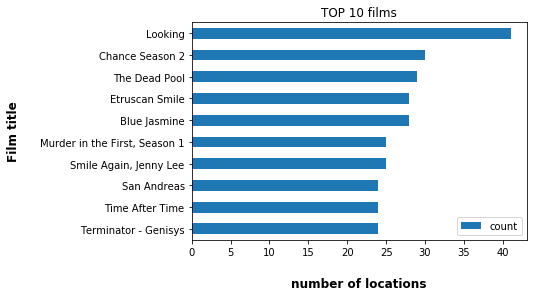

In [35]:
bar = top_film.sort_values('count').plot(kind='barh', x='title')
bar.set_title('TOP 10 films')
bar.set_ylabel("Film title", labelpad=20, weight='bold', size=12)
bar.set_xlabel("number of locations", labelpad=20, weight='bold', size=12)

at the same time, using the data of list of films, I created WordCloud
so I can visually see what are the top films with more locations used in the film in San Francisco
and what are the films that can seen as films that represent San Francisco

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

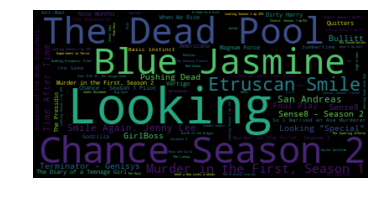

In [14]:
import numpy as np
from collections import Counter

freq = Counter(film_location.title)

wordcloud = WordCloud().generate_from_frequencies(freq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 3. How many film locations of San Francisco in the dataset?

Before looking into most popular film locations used in the list,<br>
I wanted to find out how many unique film locations are in the dataset<br>
By saying uniue location, some popular film location must be used as film location for different films<br>
therefore I had to make sure I get the number of unique value from the list of film locations<br>

In [15]:
%%bigquery

SELECT count(DISTINCT locations)
FROM `sanfranciscofilmlocation.film_locations.film_locations`;

,f0_
0,1224


As mode for locations field is NULLABLE, meaning there are some rows with no data of location<br>
and no specific film location associated with the film shot in San Francisco,<br>
one of the 1224 unique value (locations) returned must be value 'NULL'<br>
and there is 1223 of unique values meaning 1223 different film locations listed in the dataset.

# 4. TOP 10 film locations of San Francisco

out of 1223 film locations in the list,<br>
I run query below to find out the 10 most popular film locations used in San Francisco

In [16]:
%%bigquery

SELECT DISTINCT locations, COUNT(1) AS count
FROM `sanfranciscofilmlocation.film_locations.film_locations`
GROUP BY locations
ORDER BY count DESC LIMIT 10;

,locations,count
0,,54
1,Golden Gate Bridge,27
2,City Hall,23
3,"Fairmont Hotel (950 Mason Street, Nob Hill)",20
4,Treasure Island,14
5,Coit Tower,11
6,"St. Peter & Paul's Church (666 Filbert Street,...",10
7,Chinatown,10
8,Palace of Fine Arts (3301 Lyon Street),9
9,Bay Bridge,9


turns out that not specified location appears the most in the locations column of the dataset,
in this case I am actually only getting top 9 specified film locations
so I make a change to my query as follows

In [17]:
%%bigquery top_location

SELECT DISTINCT locations, COUNT(1) AS count
FROM `sanfranciscofilmlocation.film_locations.film_locations`
GROUP BY locations
HAVING locations IS NOT NULL AND locations != ""
ORDER BY count DESC LIMIT 10;

In [18]:
top_location

,locations,count
0,Golden Gate Bridge,27
1,City Hall,23
2,"Fairmont Hotel (950 Mason Street, Nob Hill)",20
3,Treasure Island,14
4,Coit Tower,11
5,Chinatown,10
6,"St. Peter & Paul's Church (666 Filbert Street,...",10
7,Golden Gate Park,9
8,Bay Bridge,9
9,Palace of Fine Arts (3301 Lyon Street),9


now using matplotlib, I visualize the data in a horizontal bar chart

Text(0.5, 0, 'no of times location used')

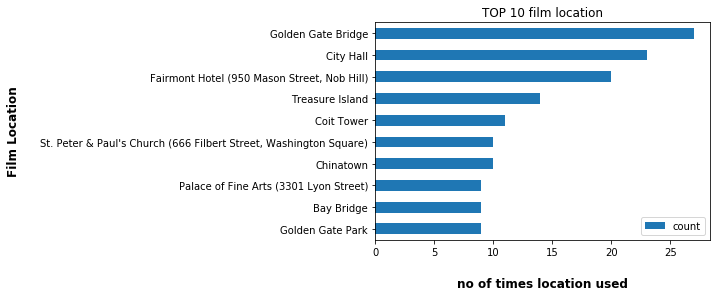

In [19]:
bar = top_location.sort_values('count').plot(kind='barh', x='locations')
bar.set_title('TOP 10 film location')
bar.set_ylabel("Film Location", labelpad=20, weight='bold', size=12)
bar.set_xlabel("no of times location used", labelpad=20, weight='bold', size=12)

at the same time, using the data of list of film locations, I created WordCloud so I can visually see what are the top film locations used in San Francisco and what are the top and key locations for films shot in San Francisco

In [20]:
%%bigquery top_location_all

SELECT locations
FROM `sanfranciscofilmlocation.film_locations.film_locations`
WHERE locations IS NOT NULL AND locations != "";

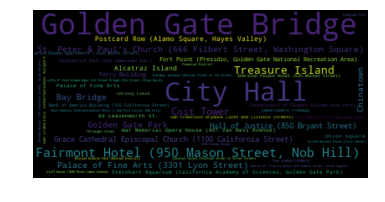

In [21]:
locationfreq = Counter(top_location_all.locations)

wordcloud = WordCloud().generate_from_frequencies(locationfreq)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# 5. How many fun facts of the location in the dataset?

some locations in the dataset come with interesting fun facts or trivia about the film or the respective film location<br>
For an example, read the fun fact associated with the location used for the film The Birds below

In [22]:
%%bigquery birds_fun

SELECT title, fun_facts
FROM `sanfranciscofilmlocation.film_locations.film_locations` 
WHERE title = "The Birds";

In [23]:
birds_fun

,title,fun_facts
0,The Birds,The pet shop featured in the film does not exi...


I will extract the fun_facts contents to make the fun fact readable

In [24]:
birdstext = birds_fun.fun_facts.values
print(birdstext)

["The pet shop featured in the film does not exist, but was based on the now-closed Robison's House of Pets formerly located on Maiden Lane."]


not every single film location in the dataset comes with interesting fun facts like above associated,<br>
I make the query to find out how many unique values of fun facts are there<br>
in order to find out how many pieces of fun facts are listed in the dataset

In [25]:
%%bigquery funfacts

SELECT count(DISTINCT fun_facts)
FROM `sanfranciscofilmlocation.film_locations.film_locations` 
WHERE fun_facts IS NOT NULL AND fun_facts != "";

In [26]:
funfacts

,f0_
0,169


there are 169 pieces of fun facts about film locations used in San Francisco in the dataset

# 6. What are the release year of the films in the dataset?

What is the number of years (release year of the film) the dataset has film locations used for?<br>
In order to get the range of release year I run the query below

In [27]:
%%bigquery
    
SELECT MIN(release_year), MAX(release_year)
FROM `sanfranciscofilmlocation.film_locations.film_locations` 

,f0_,f1_
0,1915,2018


the oldest release year in the dataset is 1915 and the latest release year is 2018
now I make the query to find out how many films per relase year in the dataset

In [28]:
%%bigquery releaseyear
    
SELECT DISTINCT release_year, COUNT(1) AS count 
FROM `sanfranciscofilmlocation.film_locations.film_locations` 
GROUP BY release_year;

In [29]:
releaseyear

,release_year,count
0,1915,2
1,1924,3
2,1927,1
3,1935,1
4,1936,3
5,1938,3
6,1941,4
7,1942,1
8,1943,1
9,1947,8


now using matplotlib, I visualize the data in a horizontal bar chart

Text(0.5, 0, 'Release year')

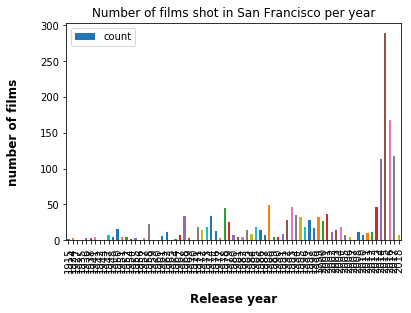

In [30]:
bar = releaseyear.plot(kind='bar', x = 'release_year', y="count")
bar.set_title('Number of films shot in San Francisco per year')
bar.set_ylabel("number of films", labelpad=20, weight='bold', size=12)
bar.set_xlabel("Release year", labelpad=20, weight='bold', size=12)

# 7. Who are the TOP 10 directors?

Who are the top 10 directors with most San Francisco film locations in the dataset?

In [31]:
%%bigquery

SELECT DISTINCT director, COUNT(1) AS count
FROM `sanfranciscofilmlocation.film_locations.film_locations`
GROUP BY director
ORDER BY count DESC LIMIT 10;

,director,count
0,Andrew Haigh,125
1,Steven Bochcho,58
2,Philip Kaufman,32
3,Woody Allen,31
4,Rozann Dawson,30
5,Buddy Van Horn,29
6,Chris Columbus,28
7,Oded Binnun/ Michel Brezis,28
8,Gus Van Sant,28
9,Lenny Abrahamson,28


# 8. Who are the TOP 10 actors?

Who are the top 10 actors with most San Francisco film locations in the dataset?

In [32]:
%%bigquery

SELECT DISTINCT actor_1, COUNT(1) AS count
FROM `sanfranciscofilmlocation.film_locations.film_locations`
GROUP BY actor_1
ORDER BY count DESC LIMIT 10;

,actor_1,count
0,Jonathan Groff,125
1,Hugh Laurie,114
2,Clint Eastwood,80
3,Taye Diggs,58
4,Jamie Clayton,42
5,Michael Douglas,40
6,Arnold Schwarzenegger,31
7,Dwayne Johnson,31
8,Steve McQueen,30
9,Cate Blanchett,28
